# Data Collection and Storage (SQL)
# Contens
* Project Description
* Stages 1. Data Overview
    * Conclusion
* Stage 2. Data Preparation
    * 2.1 Company Data
        * Conclussion
    * 2.2 Trips Data
        * Conclussion
    * 2.3 Loop to O'Hare Travel Data
        * Conclussion
* Stage 3. Exploratory Data Analysis
    * identify the top 10 regions that serve as drop-off points
    * Creating a graph: taxi companies and their number of trips, top 10 regions by number of deliveries
    * Conclussion
    
* Stage 4. Testing the hyphotheses
    * hyphoteses : trip duration from Loop to O'Hare International Airport changes during rainy Saturdays
* Conclusion

# Project Description

As an analyst for Zuber, a new ride-sharing company launched in Chicago. 

Goals / The task is to find patterns on the available information. by understanding passenger preferences and the impact of external factors on the journey, studying databases, analyzing data from competitors, and testing hypotheses about the effect of weather on travel frequency.


## Data Overview

- A database containing taxi trip information in Chicago, with the database tables as follows :
  -  Neighborhoods : data related to regions in the city of Chicago
    - name: the name of the region
    - neighborhood_id: region code
  - Cabs : taxi-related data
    - cab_id: vehicle code
    - vehicle_id: Vehicle technical ID
    - company_name: the name of the company that owns the vehicle
  - Trips: travel-related data
    - trip_id: travel code
    - cab_id: the code of the operating vehicle
    - start_ts: the date and time the journey begins (time rounded in hours)
    - end_ts: end date and time of travel (time rounded in hours)
    - duration_seconds: duration of the trip in seconds
    - distance_miles: travel distance in miles
    - pickup_location_id: pick-up area code
    - dropoff_location_id: delivery area code
  - Weather_records: weather-related data
    - record_id: weather record code
    - ts: the date and time when the weather recording was carried out (the time is rounded in hours)
    - temperature: the temperature when weather recording is carried out
    - Description: A brief description of weather conditions, such as "light rain" or "scattered clouds"

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings ('ignore')

## Data Preparation

- given dataset : /datasets/project_sql_result_01.csv 
  - company_name: the name of the taxi company
  - trips_amount: the number of trips for each taxi company on November 15-16, 2017.

- given dataset : /datasets/project_sql_result_04.csv 
  - dropoff_location_name: name of the area in Chicago where the trip ends
  - average_trips: the average number of trips that ended in each region in November 2017.
  
- given dataset : /datasets/project_sql_result_07.csv ( travel data from the Loop Region to O'Hare International Airport )
  - start_ts : pick-up date and time
  - weather_conditions : weather conditions when the journey begins
  - duration_seconds — durasi perjalanan dalam satuan detik

### Company Data

In [2]:
company_df = pd.read_csv ('/datasets/project_sql_result_01.csv')

In [3]:
# Header Style
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Data Types
company_df.dtypes

company_name    object
trips_amount     int64
dtype: object

In [5]:
# Data Shape
company_df.shape

(64, 2)

In [6]:
# Data Info
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
# Missing Value
company_df.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [8]:
# Duplicates
company_df.duplicated().sum()

0

In [9]:
# Dataset Description
company_df.describe()


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


- Findings :
  - Total dataset is 64 row and 2 columns
  - have no missing value
  - have no duplicates data
  - columns name are in the same level ( lower case)
- Insight
  - data is cleaned
- Conclussion
  - dataset company_df is ready to analize

### Trips Data

In [10]:
trips_df = pd.read_csv ('/datasets/project_sql_result_04.csv')

In [11]:
# Header Style
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
# Data Types
trips_df.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [13]:
# Data Shape
trips_df.shape

(94, 2)

In [14]:
# Data Info
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
# Missing Value
trips_df.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [16]:
# Duplicates
trips_df.duplicated().sum()

0

In [17]:
# Dataset Description
trips_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


- Findings :
  - Total dataset is 94 row and 2 columns
  - have no missing value
  - have no duplicates data
  - columns name are in the same level ( lower case)
- Insight
  - data is cleaned
- Conclussion
  - dataset trips_df is ready to analize

### Loop to O'Hare Data

In [18]:
# load dataset
looptohare_df = pd.read_csv ('/datasets/project_sql_result_07.csv')

In [19]:
# Header Style
looptohare_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [20]:
# Data Types
looptohare_df.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [21]:
# Data Shape
looptohare_df.shape

(1068, 3)

In [22]:
# Data Info
looptohare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [23]:
# Missing Value
looptohare_df.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [24]:
# Duplicates
looptohare_df.duplicated().sum()

197

In [25]:
# Dataset Description
looptohare_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


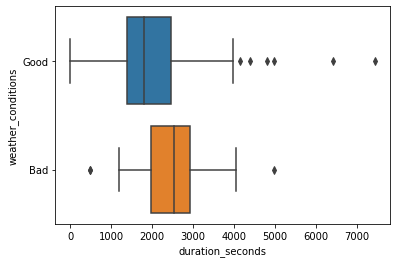

In [26]:
#cek boxplot
sns.boxplot(x='duration_seconds', y='weather_conditions', data=looptohare_df);

- Findings 
  - suspect there are outlier data
      - mean value and max value is differ significantly
      - check from boxplot
- Insight
  - need to remove outliers

In [27]:
#remove outliers
Q1_duration = looptohare_df['duration_seconds'].quantile (0.25)
Q3_duration = looptohare_df['duration_seconds'].quantile (0.75)
IQR_duration = Q3_duration - Q1_duration


lower_whisker_duration = Q1_duration - (1.5*IQR_duration)
upper_whisker_duration = Q3_duration + (1.5*IQR_duration)

print ("Lower whisker duration :",lower_whisker_duration )
print ("Upper whisker duration :",upper_whisker_duration )


Lower whisker duration : -274.375
Upper whisker duration : 4292.625


In [28]:
#cek boxplot of new df without outliers
looptohare_new_df = looptohare_df[(looptohare_df['duration_seconds']>lower_whisker_duration)&(looptohare_df['duration_seconds']<upper_whisker_duration)].reset_index(drop=True)

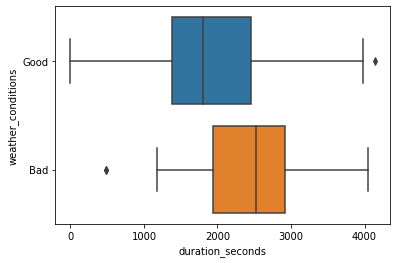

In [29]:
#cek boxplot
sns.boxplot(x='duration_seconds', y='weather_conditions', data=looptohare_new_df);

- Findings 
  - outliers removed
    
- Insight
  - dataset looptohare_new_df ready to analize

## Data Exploratory Analysis


### identify the top 10 regions that serve as drop-off points

In [30]:
# aggregate of top 10 drop off
top10_dropoff = trips_df.sort_values('average_trips', ascending=False).head(10)
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


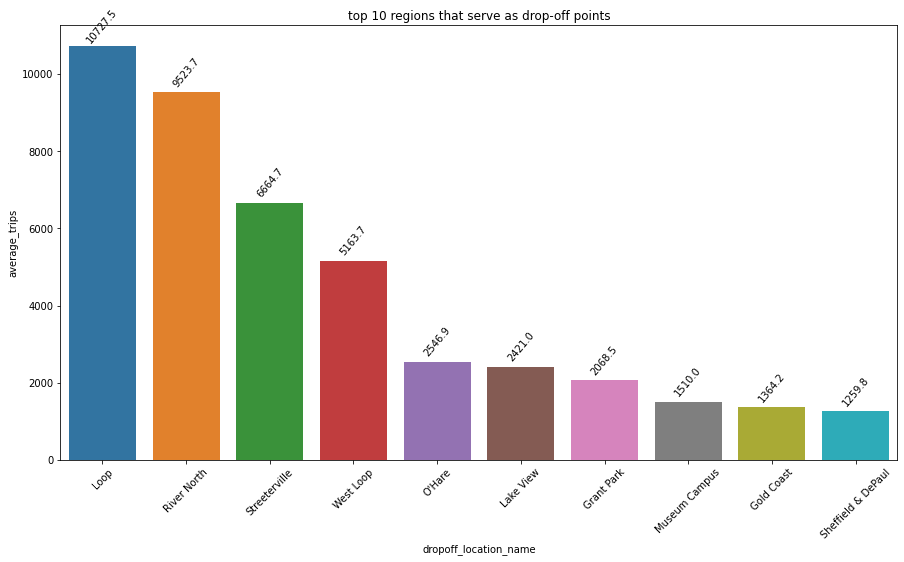

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))

splot = sns.barplot(data = top10_dropoff, x='dropoff_location_name', y='average_trips')
plt.title('top 10 regions that serve as drop-off points')
plt.xticks(rotation=45);

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=50, 
                   textcoords = 'offset points')
plt.show()

- Findings :
  - the highest average trips region is coming from Loop region with total average_trips = 10727.5
  - the top 4 region average trips ( Loop, River North, Streeterville, West Loop ) are significantly differ with the rest region
 


### taxi companies and their number of trips, top 10 regions by number of deliveries

In [32]:
# aggregate of top 10 region for taxi companies and their number of trips
top10_taxi_companies = company_df.sort_values('trips_amount', ascending=False).head(10)
top10_taxi_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


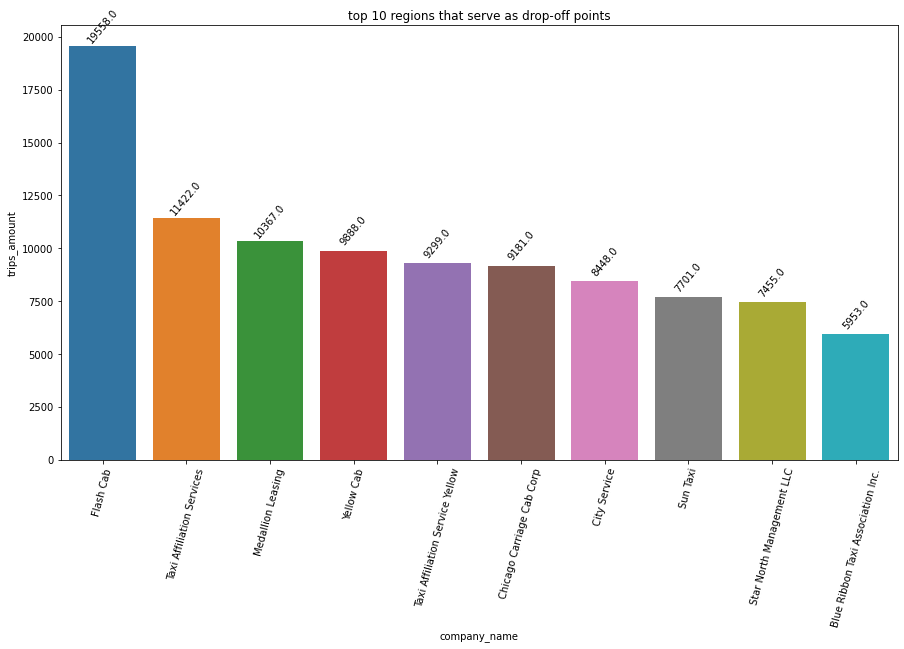

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))

splot = sns.barplot(data = top10_taxi_companies, x='company_name', y='trips_amount')
plt.title('top 10 regions that serve as drop-off points')
plt.xticks(rotation=75);

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=50, 
                   textcoords = 'offset points')
plt.show()

- Findings :
  - The highest trips amount is from Flash Cab with total 19558 trips
  - while others cabs are almost have same number of trips
  - the trips amount is signifficantly differ between 1st rank with 2nd rank
- Insight
  - Flash Cab is famous taxi 


### Conclussion
- Conclussion
  - Loop, River North, Streeterville, West Loop are top 4 drop-off points region it is showing that these regions has highest population
  - Flash Cab is leading taxi company
 

## Hypotheses Test

- testing the hypotheses :
  - Null Hypotheses (H0) = trips duration from Loop to O'Hare International Airport of good weather and bad weather during saturday is the same
  - Alternate Hypotheses = trips duration from Loop to O'Hare International Airport of good weather and bad weather during saturday is not the same
- Alpha = 0.05
- numerical vs numerical
- methode : Independent T-Test
trip duration from Loop to O'Hare International Airport changes during rainy Saturdays

In [34]:
#prepare the data for testing
looptohare_new_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [35]:
#calculate the 'start_ts' counts
pd.to_datetime(looptohare_new_df['start_ts']).dt.date.value_counts()

2017-11-11    423
2017-11-04    367
2017-11-18    179
2017-11-25     93
Name: start_ts, dtype: int64

In [36]:
#calculate the 'weather_conditions' counts
looptohare_new_df['weather_conditions'].value_counts()

Good    883
Bad     179
Name: weather_conditions, dtype: int64

In [37]:
def verdict (p_value, alpha = 0.05):
    print ('P-Value:',p_value)
    if p_value < alpha:
        print ('H1 Accepted / H0 Rejected')
    else :
        print ('H0 Accepted / H1 Rejected')

In [38]:
good_weather_data = looptohare_new_df[looptohare_new_df['weather_conditions']=='Good'].reset_index(drop=True)
bad_weather_data = looptohare_new_df[looptohare_new_df['weather_conditions']=='Bad'].reset_index(drop=True)
good_weather_data.shape,bad_weather_data.shape

((883, 3), (179, 3))

In [39]:
#check varians
np.var(good_weather_data['duration_seconds']),np.var(bad_weather_data['duration_seconds'])

(497572.525999469, 483684.220342686)

In [40]:
#check mean
np.mean(good_weather_data['duration_seconds']),np.mean(bad_weather_data['duration_seconds'])

(1979.2661381653454, 2412.9441340782123)

In [41]:
alpha = 0.05
p_value_ttest = st.ttest_ind(good_weather_data['duration_seconds'],bad_weather_data['duration_seconds'], equal_var=True).pvalue
print ('P-Value =',p_value_ttest )
if (p_value_ttest < alpha):
    print('H1 Accepted / H0 Rejected')
else:
    print('H0 Accepted / H1 Rejected')

P-Value = 1.2430038032744411e-13
H1 Accepted / H0 Rejected


- Findings:
  - trips duration from Loop to O'Hare International Airport of good weather and bad weather during saturday is not the same
  - varians and mean duration values of good_weather_data and bad_weather_data is not significantly differ
- Insight :
  - in bad weather condition driver need to add the backup time to ensure passenger are not late catch up the flight schedule
- Recomendation :
  - develop SOP to anticipate increasing trip duration due to bad weather condition

## Conclusion

Based on the Zuber ride-sharing database we know that :
  - the highest average trips region is coming from Loop region with total average_trips = 10727.5
  - the top 4 region average trips comming from Loop, River North, Streeterville, West Loop regions are significantly differ with the rest region
  - Loop, River North, Streeterville, West Loop are are assuming that these regions has higher population than the other regions
  - Flash Cab is leading taxi company 
  - trips duration from Loop to O'Hare International Airport of good weather and bad weather during saturday is not the same
  - varians and mean duration values of good_weather_data and bad_weather_data is not significantly differ
  - in bad weather condition driver need to add the backup time to ensure passenger are not late catch up the flight schedule
  - need to develop SOP to anticipate increasing trip duration due to bad weather condition